<IPython.core.display.Javascript object>


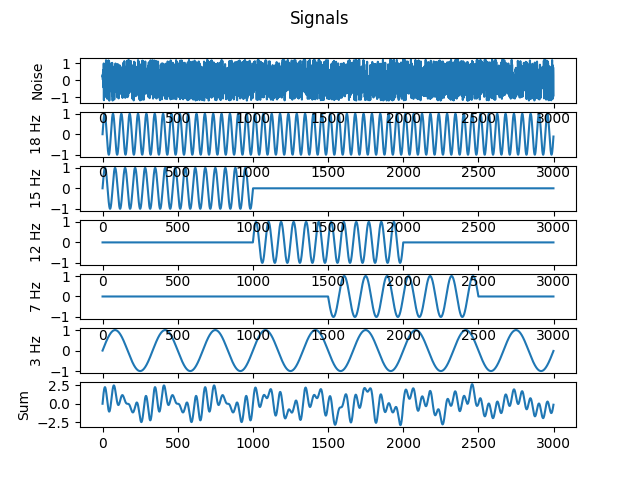

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from tftb.generators import noisecu

# -- The signals --
# Amplitude
A = 1

# Frequencies
f1 = 3
f2 = 7
f3 = 12
f4 = 15
f5 = 18

# Sampling
Fs = 1000
T = 1/float(Fs)
L = 3000

t = np.arange(L)*T
t2 = np.arange(1500,2500)*T
t3 = np.arange(1000,2000)*T
t4 = np.arange(0,1000)*T

s1 = A*np.sin(2*np.pi*f1*t);
s2 = np.concatenate([ np.zeros(1500), A*np.sin(2*np.pi*f2*t2), np.zeros(500) ])
s3 = np.concatenate([ np.zeros(1000), A*np.sin(2*np.pi*f3*t3), np.zeros(1000) ])
s4 = np.concatenate([ A*np.sin(2*np.pi*f4*t4), np.zeros(2000) ])
s5 = np.concatenate([ A*np.sin(2*np.pi*f5*t) ])

# Analytic complex uniform white noise.
noise = noisecu(L)

S = s1 + s2 + s3 + s4 + s5# + np.absolute(noise)

plt.figure(1)
plt.suptitle("Signals")

plt.subplot(7,1,6)
plt.ylabel("3 Hz")
plt.plot(s1)

plt.subplot(7,1,5)
plt.ylabel("7 Hz")
plt.plot(s2)

plt.subplot(7,1,4)
plt.ylabel("12 Hz")
plt.plot(s3)

plt.subplot(7,1,3)
plt.ylabel("15 Hz")
plt.plot(s4)

plt.subplot(7,1,2)
plt.ylabel("18 Hz")
plt.plot(s5)

plt.subplot(7,1,1)
plt.ylabel("Noise")
plt.plot(noise)

plt.subplot(7,1,7)
plt.ylabel("Sum")
plt.plot(S)

<IPython.core.display.Javascript object>


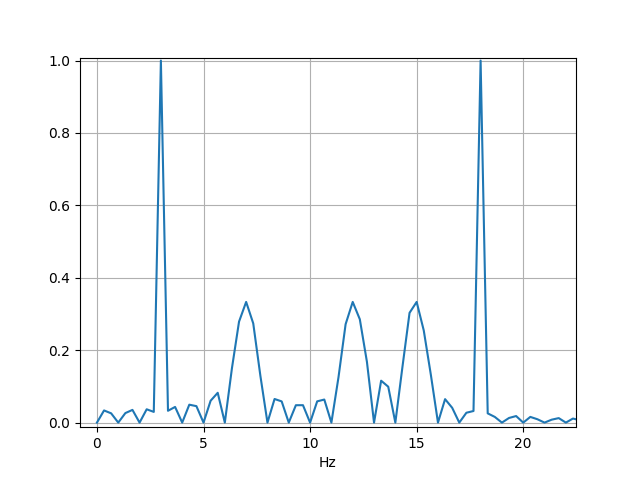

In [4]:
# FFT
result = np.fft.fft(S)

freq = np.fft.fftfreq(L, T)


plt.figure(2)
plt.grid()
plt.xlabel("Hz")
plt.plot(freq[0:L/2], 2*np.absolute(result/L)[0:L/2])

<IPython.core.display.Javascript object>


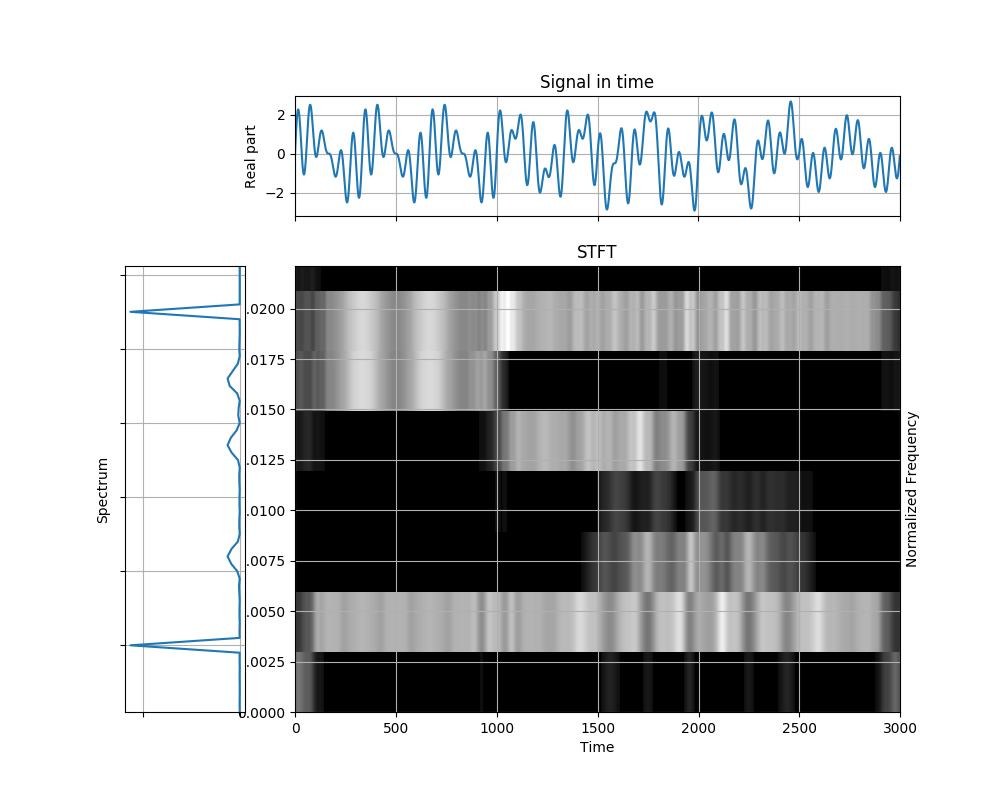

In [5]:
# Short-time Fourier Transform
from scipy.signal import hamming
from tftb.processing.linear import ShortTimeFourierTransform


Nx = len(S)
nsc = int(np.floor(Nx/4.5))
window = hamming(nsc)
nov = int(np.floor(nsc/2))

stft = ShortTimeFourierTransform(S, n_fbins=nov, fwindow=window)
stft.run()
stft.plot(show_tf=True, cmap=plt.cm.gray)

<IPython.core.display.Javascript object>


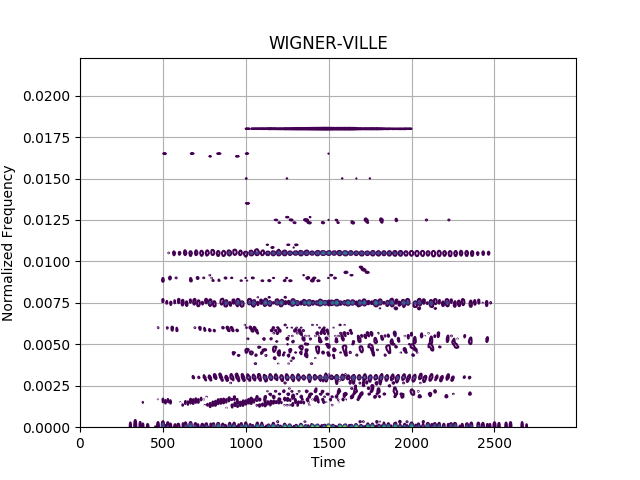

In [6]:
# Wigner-Ville Distribution
from tftb.processing.cohen import WignerVilleDistribution
wvd = WignerVilleDistribution(S)
wvd.run()
wvd.plot(kind='contour')

<IPython.core.display.Javascript object>


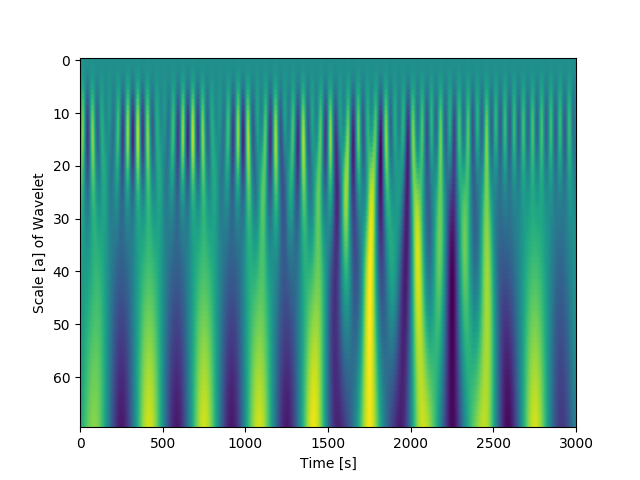

In [7]:
# Continous Wavelet Transform
from scipy.signal import cwt, ricker
widths = np.arange(1, 71)
cwtmatr = cwt(S, ricker, widths) # ricker is mexican hat wavelet
plt.figure(5)
plt.xlabel("Time [s]")
plt.ylabel("Scale [a] of Wavelet")
plt.imshow(cwtmatr, aspect='auto')

<IPython.core.display.Javascript object>


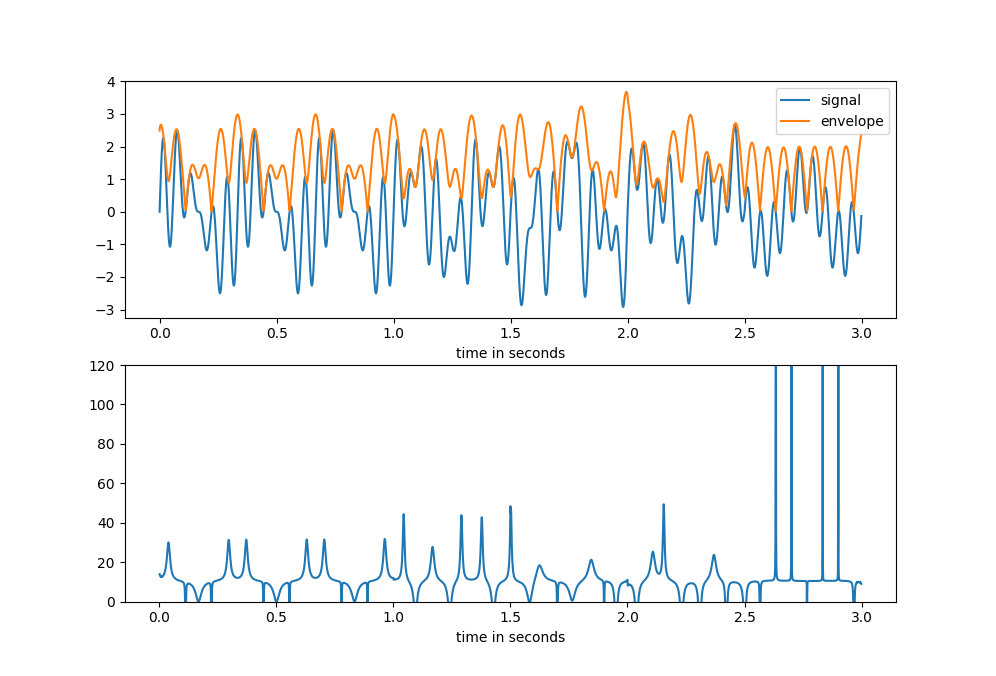

(0.0, 120.0)

In [8]:
# Hilbert Transform
# from https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.signal.hilbert.html
from scipy.signal import hilbert

analytic_signal = hilbert(S)
amplitude_envelope = np.abs(analytic_signal)

instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * Fs)

fig = plt.figure(6)
ax0 = fig.add_subplot(211)
ax0.plot(t, S, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)